# 1. Import the required librairies.

In [115]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import math

import warnings
warnings.filterwarnings("ignore")

# 2.Loading and exploring the data

## Load data and display the first 7 rows of the table.

In [116]:
# Data Preprocessing
dataset = pd.read_csv('store_data.csv',header=None)
dataset.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## How many products is purchased during the week the data was recorded? Count the number of unique products in the store and compute the number of rules that can be generated if we proceed by brute force approach?

In [117]:
# creating a list of dataframe columns 
columns = list(dataset)
jlist = []
for i in columns: 
    list_item = dataset[i].tolist()
    jlist.extend(list_item)

In [118]:
# Remove 'NaN' items from list 
jlist[:] = (value for value in jlist if value != 'NaN')

In [119]:
print ("Number of Products Purchased =", len(jlist))

Number of Products Purchased = 150020


In [120]:
s = pd.Series(jlist)
print ("Number of Unique Products Purchased = ", s.nunique())

Number of Unique Products Purchased =  120


In [121]:
print ("List of Unique Products =", s.unique())

List of Unique Products = ['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomato juice' 'green beans' 'strawberries'

In [122]:
# Total Number of ItemSets is 2^d, where d is number of unique items
print ("Number of Item-Sets = ", math.pow(2,s.nunique()))

Number of Item-Sets =  1.329227995784916e+36


In [123]:
# If K is 3, number of association-rules is 3^d - 2^(d+1) + 1
print ("With K=3, Number of Association-Rules = ", math.pow(3,s.nunique()) - math.pow(2,(s.nunique()+1)) + 1)

With K=3, Number of Association-Rules =  1.797010299914431e+57


### Observation - Brute-Force: As seen above, the number of association-rules possible is exceptionally high number and computationally prohibitive

## Sort the data proportionally to the number of items in each transaction (largest transactions first).

In [124]:
# Add Column to indicate number of NULL items in each row
dataset['NaN-Count'] = dataset.isnull().sum(axis=1)

In [125]:
# Sort the data-frame with max non-NULL items in each row. Each row represents a transaction
dataset = dataset.sort_values(by=['NaN-Count'])
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,NaN-Count
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,0
1120,fresh tuna,avocado,vegetables mix,green grapes,honey,whole weat flour,french fries,cottage cheese,energy drink,tomato juice,...,green tea,oil,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,cereals,NaN,1
1111,fresh tuna,frozen vegetables,parmesan cheese,pepper,spaghetti,milk,olive oil,black tea,almonds,salmon,...,cake,gums,oil,cereals,chocolate,frozen smoothie,protein bar,mayonnaise,NaN,1
1623,burgers,fresh tuna,ham,grated cheese,frozen vegetables,tomatoes,parmesan cheese,spaghetti,mineral water,chocolate,...,vegetables mix,nonfat milk,muffins,pancakes,cake,french fries,protein bar,NaN,NaN,2
1604,dessert wine,grated cheese,shrimp,frozen vegetables,ground beef,spaghetti,mineral water,soup,avocado,milk,...,whole wheat rice,gums,oil,clothes accessories,frozen smoothie,NaN,NaN,NaN,NaN,4


In [126]:
dataset.drop("NaN-Count", axis=1,inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 0 to 3944
Data columns (total 20 columns):
0     7501 non-null object
1     5747 non-null object
2     4389 non-null object
3     3345 non-null object
4     2529 non-null object
5     1864 non-null object
6     1369 non-null object
7     981 non-null object
8     654 non-null object
9     395 non-null object
10    256 non-null object
11    154 non-null object
12    87 non-null object
13    47 non-null object
14    25 non-null object
15    8 non-null object
16    4 non-null object
17    4 non-null object
18    3 non-null object
19    1 non-null object
dtypes: object(20)
memory usage: 1.2+ MB


# 3. Reshaping the data: The Apyori library we are using requires our dataset to be in the form of a list of lists. The whole dataset should be a large list including all the transaction lists. If you used pandas to load the dataset, then your current form of data is a pandas dataframe and you should convert it to list of lists

In [127]:
%%timeit
## Algorithm expects a List and list of lists to work with.
transactions = [] ## This is the super list or big list

for i in range(0, 7500): ## Going through each row
    transactions.append([str(dataset.values[i,j]) for j in range(0, 19)]) ## str= set all the products to Strings 

1.73 s ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [128]:
print (len(transactions))

7500


# 4. We are only interested in finding rules for the items that have certain minimum occurence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence). The first task is therefore to make a good strategy for setting optimal minimum values for support and confidence. Try to argue your strategy.

In [129]:
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2) 

## min_length=Only consider transactions where minm 2 products are purchased

## min_support=(3*7)/7500 : Choose products which are bought min 3 times a day for a week (7 days)
## That is Number of times this product was bought out of 7500

## confidence= People buying product 1 will also buy Product 2 at least 20% of the time

# 5. Generate the frequent itemsets and the rules considering the obtained support and confidence thresholds.

In [130]:
# Visualising the results
rules_lst = list(rules)

# 6. Display the generated rules. How many they are? Try to analyze these associations.

In [131]:
print ("Number of Rules =", len(rules_lst))

Number of Rules = 160


In [132]:
print ("Sample Rule =", rules_lst[0])

Sample Rule = RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)])


### Observation:  The RelationRecord reflects a subset of items, while ordered_statistics is a list of OrderedStatistics, which reflect the rules. Each OrderedStatistics' items_base is the antecedent and the items_add is the consequent. 
### 'light cream' -> 'chicken' with 0.2905982905982906 confidence, 4.843304843304844 lift,  support = 0.00453333

# 7. Before visualizing the results, display the rules in a more clear way; in a table showing the support, the confidence, and lift for each rule.

In [133]:
ord_stat = rules_lst[0][2]
ord_stat[0].items_add

frozenset({'chicken'})

In [134]:
def get_frozenset_elements(frozen_set):
    frozenset_list = []
    for i in frozen_set:
        frozenset_list.append(i)
    return frozenset_list

list_ = get_frozenset_elements(ord_stat[0].items_base)
list_

['light cream']

In [135]:
# Function to convert   
def listToString(s):  
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 

In [136]:
# convert the rules into a list 
listRules = [list(rules_lst[i][0]) for i in range(0,len(rules_lst))]
listRules[0]

['light cream', 'chicken']

In [137]:
# go through the rules and the corresponding support, confidence, list. Add them into a list 
lst = []
for i in range(0,len(rules_lst)):
    dict_item = {}
    #rules
    dict_item.update({'rule': listToString(listRules[i])})
    #support
    dict_item.update({'support': str(rules_lst[i][1])})
    #confidence & lift 
    ord_stat = rules_lst[i][2]
    dict_item.update({'confidence': str(ord_stat[0].confidence)})
    dict_item.update({'lift': str(ord_stat[0].lift)})
    #print (dict_item)
    #df_rules.append(pd.Series(dict_item), ignore_index=True)
    lst.append(dict_item)

In [138]:
# Creating an dataframe from the list, so that it can be shown in table format 
df_rules =  pd.DataFrame(lst)
df_rules.head()

,rule,support,confidence,lift
0,light cream chicken,0.004533333333333334,0.2905982905982906,4.843304843304844
1,mushroom cream sauce escalope,0.005733333333333333,0.30069930069930073,3.7903273197390845
2,pasta escalope,0.005866666666666667,0.37288135593220345,4.700185158809287
3,honey fromage blanc,0.0033333333333333335,0.2450980392156863,5.163582286847324
4,herb & pepper ground beef,0.016,0.3234501347708895,3.2915549671393096


# 8. We can visualize rulesets as graphs, with items as nodes and connections as arcs between them. This help to find interesting (subjective) patterns from the data. To achieve this goal, use NetworkXpython library.

### Scatter Plot 

In [139]:
support = df_rules['support'].astype(float)
confidence = df_rules['confidence'].astype(float)

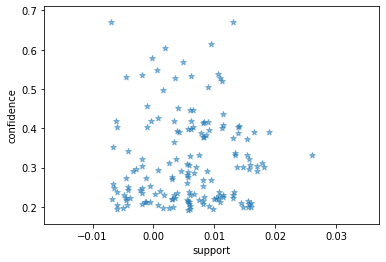

In [140]:
# Scatter Plot between Support and Confi
import random
import matplotlib.pyplot as plt 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### Network Graph

In [141]:
def draw_network_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])

        ord_stat = rules_lst[i][2]
        antecedants = get_frozenset_elements(ord_stat[0].items_base)
        #print ("Antecedents=", antecedants)
        
        for a in antecedants:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        item_stat = rules_lst[i][2]
        consequents = get_frozenset_elements(item_stat[0].items_add)
        #print ("Cntecedents=", consequents)
    
        for c in consequents:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

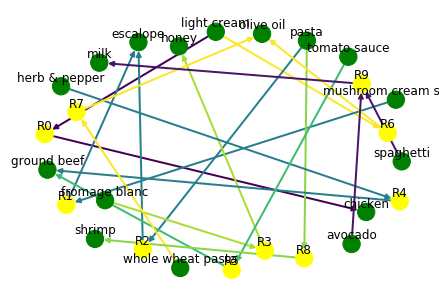

In [142]:
# Draw for 10 rules to show the antecedents and consequents 
draw_network_graph (rules_lst, 10)

# 10. Apply the algorithm apriroi and fp-growth implemented in frequent_patterns library. Then, find the time spent to generate the rules by the two apriori implementations and fp-growth. Based on these runtimes, compare the effectiveness and complexity of the two algorithms.

In [143]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [144]:
df_data = dataset

In [145]:
df_data.fillna(0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1120,fresh tuna,avocado,vegetables mix,green grapes,honey,whole weat flour,french fries,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,oil,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,cereals,0
1111,fresh tuna,frozen vegetables,parmesan cheese,pepper,spaghetti,milk,olive oil,black tea,almonds,salmon,honey,cake,gums,oil,cereals,chocolate,frozen smoothie,protein bar,mayonnaise,0
1623,burgers,fresh tuna,ham,grated cheese,frozen vegetables,tomatoes,parmesan cheese,spaghetti,mineral water,chocolate,olive oil,vegetables mix,nonfat milk,muffins,pancakes,cake,french fries,protein bar,0,0
1604,dessert wine,grated cheese,shrimp,frozen vegetables,ground beef,spaghetti,mineral water,soup,avocado,milk,salmon,whole wheat rice,gums,oil,clothes accessories,frozen smoothie,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1252,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2283,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6049,escalope,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [146]:
df_data_ht = pd.get_dummies(df_data, drop_first=True)
df_data_ht.head()

,0_antioxydant juice,0_asparagus,0_avocado,0_babies food,0_bacon,0_barbecue sauce,0_black tea,0_blueberries,0_body spray,0_bramble,...,15_magazines,15_protein bar,15_salmon,15_sparkling water,16_french fries,16_frozen smoothie,17_protein bar,17_spinach,18_mayonnaise,18_spinach
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
%%timeit
frequent_itemsets = apriori(df_data_ht, min_support=0.003, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

2.34 s ± 36.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [148]:
%%timeit
rules_fp = fpgrowth(df_data_ht, min_support=0.003, use_colnames=True)

365 ms ± 4.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Observation:
### fpgrowth timing is 365ms, where-as apriori from "apryori is 1.75s" and from "mlextend is 2.34s".
### This shows fpgrowth is almost 5-times faster than the best apriori algorithm. 
### This indicates that fpgrowth algorithm is much more effecient/effective and less complex than apriori algorithm